In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import pingouin as pg




importación de los datos de https://www.kaggle.com/datasets/dumbgeek/countries-dataset-2020
cambio del nombre de las columnas de ingles a español
analizamos el tipo de variables y la normalidad de los datos para seleccionar el 
tipo de coeficiente de correlación a utilizar


In [3]:

data=pd.read_csv('demografico.csv')
data.columns=['País','indice de costo de vida','indice de Renta','indice de costo de vida más alquier',
              'indice de comestibles','indice de precios de restaurantes',
              'indice de poder adquisitivo local']
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 132 non-null    object 
 1   indice de costo de vida              132 non-null    float64
 2   indice de Renta                      132 non-null    float64
 3   indice de costo de vida más alquier  132 non-null    float64
 4   indice de comestibles                132 non-null    float64
 5   indice de precios de restaurantes    132 non-null    float64
 6   indice de poder adquisitivo local    132 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.3+ KB


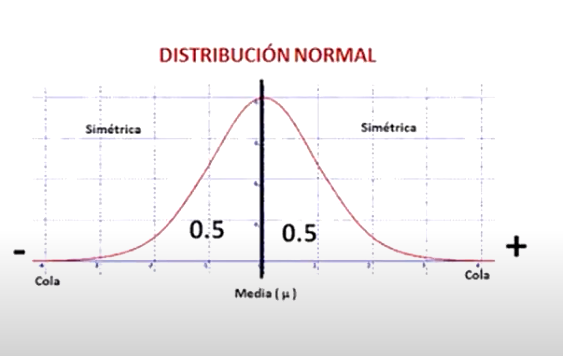

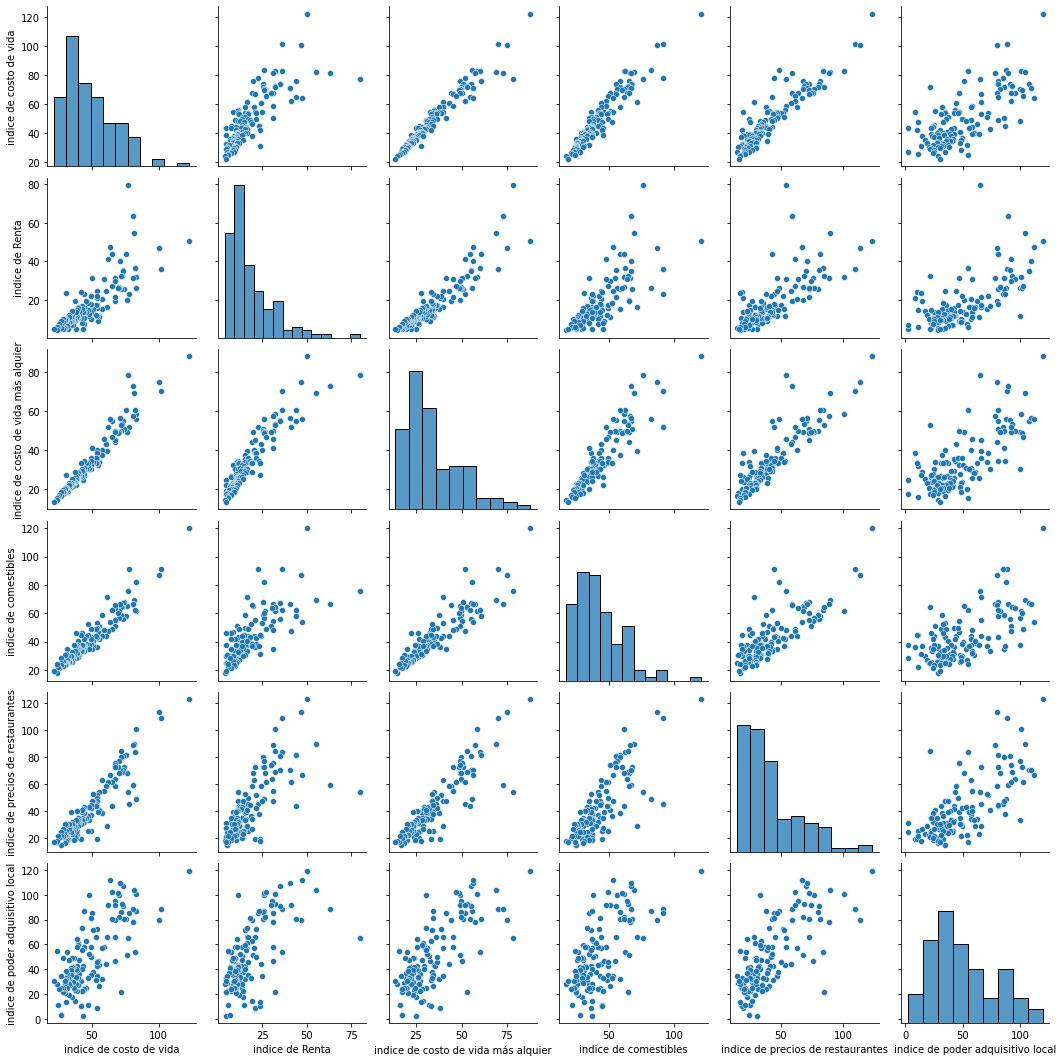

In [4]:
sns.pairplot(data)
plt.show()

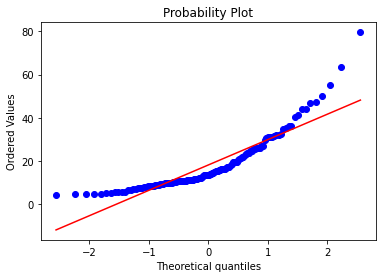

In [4]:
stats.probplot(data["indice de Renta"],dist="norm",plot=pylab)
pylab.show()

seleccionamos el coeficiente de correlación (Pearson, Espearman ,Kendall)
las variables no presentan distribución normal...

In [19]:
Matris_Correlacion=data.corr(method='kendall')
Matris_Correlacion

,indice de costo de vida,indice de Renta,indice de costo de vida más alquier,indice de comestibles,indice de precios de restaurantes,indice de poder adquisitivo local
indice de costo de vida,1.000000,0.666821,0.880444,0.805252,0.735917,0.474725
indice de Renta,0.666821,1.000000,0.786512,0.616693,0.604049,0.473569
indice de costo de vida más alquier,0.880444,0.786512,1.000000,0.774783,0.717714,0.480134
indice de comestibles,0.805252,0.616693,0.774783,1.000000,0.595801,0.403100
indice de precios de restaurantes,0.735917,0.604049,0.717714,0.595801,1.000000,0.517927
indice de poder adquisitivo local,0.474725,0.473569,0.480134,0.403100,0.517927,1.000000


In [7]:
Matris_Correlacion=data.corr(method='spearman')
Matris_Correlacion




,indice de costo de vida,indice de Renta,indice de costo de vida más alquier,indice de comestibles,indice de precios de restaurantes,indice de poder adquisitivo local
indice de costo de vida,1.000000,0.852355,0.978340,0.946005,0.893863,0.666850
indice de Renta,0.852355,1.000000,0.935306,0.805099,0.785351,0.644239
indice de costo de vida más alquier,0.978340,0.935306,1.000000,0.928391,0.877008,0.673849
indice de comestibles,0.946005,0.805099,0.928391,1.000000,0.783879,0.580020
indice de precios de restaurantes,0.893863,0.785351,0.877008,0.783879,1.000000,0.710080
indice de poder adquisitivo local,0.666850,0.644239,0.673849,0.580020,0.710080,1.000000


<AxesSubplot:>

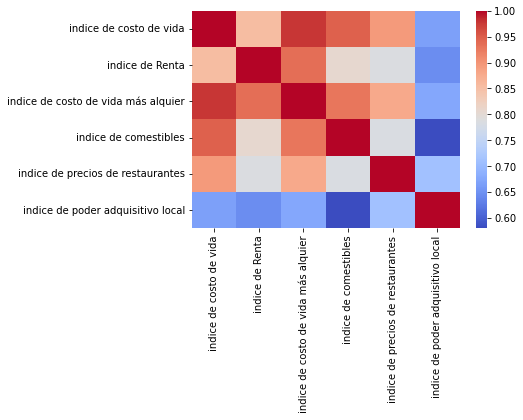

In [9]:
sns.heatmap(Matris_Correlacion,
            xticklabels=Matris_Correlacion.columns,
            yticklabels=Matris_Correlacion.columns,
            cmap='coolwarm'
            )

#analisis de significancia
que es la significancia----
si la siginificancia es mayor al 0,05 la correlación entre variables no existe


In [20]:

corr=pg.pairwise_corr(data,method='spearman')
corr.sort_values(by=['p-unc'])[['X','Y','r','p-unc']]

,X,Y,r,p-unc
1,indice de costo de vida,indice de costo de vida más alquier,0.880444,1.117931e-50
2,indice de costo de vida,indice de comestibles,0.805252,1.111652e-42
5,indice de Renta,indice de costo de vida más alquier,0.786512,8.496033e-41
9,indice de costo de vida más alquier,indice de comestibles,0.774783,1.205828e-39
3,indice de costo de vida,indice de precios de restaurantes,0.735917,6.176324e-36
10,indice de costo de vida más alquier,indice de precios de restaurantes,0.717714,2.880658e-34
0,indice de costo de vida,indice de Renta,0.666821,8.434927e-30
6,indice de Renta,indice de comestibles,0.616693,9.919087e-26
7,indice de Renta,indice de precios de restaurantes,0.604049,9.374571e-25
12,indice de comestibles,indice de precios de restaurantes,0.595801,3.951291e-24


conclusión